# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.89331481716                   -1.43    6.50s
  2   +19.72189268640        0.91       -0.87   10.7ms
  3   +13.07583504487        0.82       -0.44   10.5ms
  4   +11.51874336389        0.19       -0.32   8.50ms
  5   +10.48378702401        0.01       -0.57   8.42ms
  6   +9.765338316162       -0.14       -0.81   8.46ms
  7   +9.104847228969       -0.18       -0.88   9.46ms
  8   +8.541214399198       -0.25       -0.90   45.4ms
  9   +8.205953712242       -0.47       -0.84   10.0ms
 10   +8.070659097700       -0.87       -0.95   8.58ms
 11   +7.992979841411       -1.11       -1.06   8.50ms
 12   +7.925550717496       -1.17       -0.97   8.48ms
 13   +7.821547435924       -0.98       -0.84   6.48ms
 14   +7.814542542490       -2.15       -1.02   6.50ms
 15   +7.803575185460       -1.96       -0.87   6.41ms
 16   +7.799355764258       -2.37       -1.05   6.42ms
 17   +7.77

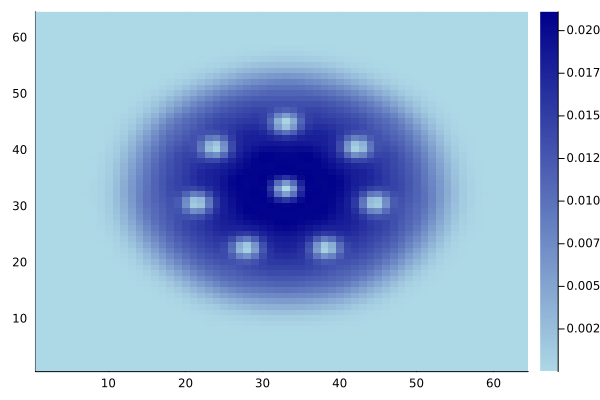

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)